# **IMAGE CLASSIFICATION PROJECT**


> by : SASKIA DWI ULFAH



***IMPORT LIBRARY***

In [81]:
import numpy as np
from google.colab import drive
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer

tf.random.set_seed(21)

**KONEKSI KE GOOGLE DRIVE**

In [82]:
# membuat koneksi ke drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


***PATH* GAMBAR YANG AKAN DIGUNAKAN**

In [83]:
# mendefinisikan path 

train_directory = '/content/drive/MyDrive/rockpaperscissors/train'
validation_directory = '/content/drive/MyDrive/rockpaperscissors/validation'

train_paper = '/content/drive/MyDrive/rockpaperscissors/train/paper'
train_rock = '/content/drive/MyDrive/rockpaperscissors/train/rock'
train_scissors = '/content/drive/MyDrive/rockpaperscissors/train/scissors'

val_paper = '/content/drive/MyDrive/rockpaperscissors/validation/paper'
val_rock = '/content/drive/MyDrive/rockpaperscissors/validation/rock'
val_scissors = '/content/drive/MyDrive/rockpaperscissors/validation/scissors'


***IMAGE DATA GENERATOR***

In [84]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 30,
                    shear_range = 0.2,
                    width_shift_range=0.2, 
                    height_shift_range=0.2,
                    zoom_range=0.2,
                    fill_mode = 'nearest',
                    horizontal_flip = True)

validation_datagen = ImageDataGenerator(
                        rescale = 1./255,
                        rotation_range = 30,
                        shear_range = 0.2,
                        width_shift_range=0.2, 
                        height_shift_range=0.2,
                        zoom_range=0.2,
                        fill_mode = 'nearest',
                        horizontal_flip = True)

In [85]:
train_generator = train_datagen.flow_from_directory(
                    train_directory,
                    target_size = (150,150),
                    batch_size=32,
                    class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(
                        validation_directory,
                        target_size = (150,150),
                        batch_size=32,
                        class_mode = 'categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


***SEQUENTIAL MODEL***

In [86]:
model = tf.keras.models.Sequential()
model.add(InputLayer(input_shape=(150,150,3)))

model.add(Conv2D(25,(5,5), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(50,(5,5), activation='relu', strides=(2,2), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(70,(3,3), activation='relu', strides=(2,2), padding='same'))
model.add(MaxPool2D(pool_size=(2,2), padding='valid'))


model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [87]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [88]:
history = model.fit(train_generator,
          steps_per_epoch=16,  
          epochs=32, 
          validation_data=validation_generator, 
          validation_steps=8,  
          verbose=2)

Epoch 1/32
16/16 - 24s - loss: 1.0979 - accuracy: 0.3942 - val_loss: 1.0590 - val_accuracy: 0.4688
Epoch 2/32
16/16 - 22s - loss: 1.0460 - accuracy: 0.4357 - val_loss: 1.0553 - val_accuracy: 0.4023
Epoch 3/32
16/16 - 22s - loss: 0.9993 - accuracy: 0.5311 - val_loss: 0.9226 - val_accuracy: 0.5742
Epoch 4/32
16/16 - 23s - loss: 0.8485 - accuracy: 0.6328 - val_loss: 0.7084 - val_accuracy: 0.7109
Epoch 5/32
16/16 - 23s - loss: 0.6693 - accuracy: 0.7012 - val_loss: 0.5910 - val_accuracy: 0.7500
Epoch 6/32
16/16 - 22s - loss: 0.5550 - accuracy: 0.7718 - val_loss: 0.4443 - val_accuracy: 0.8359
Epoch 7/32
16/16 - 22s - loss: 0.4897 - accuracy: 0.8071 - val_loss: 0.4641 - val_accuracy: 0.8438
Epoch 8/32
16/16 - 23s - loss: 0.4728 - accuracy: 0.8086 - val_loss: 0.4624 - val_accuracy: 0.8398
Epoch 9/32
16/16 - 23s - loss: 0.4345 - accuracy: 0.8555 - val_loss: 0.3942 - val_accuracy: 0.8477
Epoch 10/32
16/16 - 23s - loss: 0.4221 - accuracy: 0.8418 - val_loss: 0.4428 - val_accuracy: 0.8359
Epoch 11/

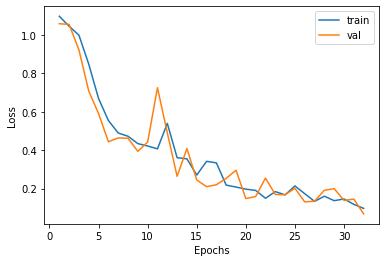

In [89]:
epochs = np.arange(1,33)
plt.plot(epochs, history.history['loss'],label='train')
plt.plot(epochs, history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

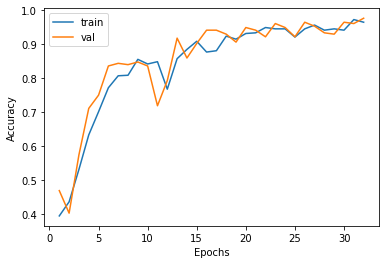

In [90]:
plt.plot(epochs, history.history['accuracy'],label='train')
plt.plot(epochs, history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

***PREDICTING IMAGE***

Saving download (3).jpg to download (3) (5).jpg
rock


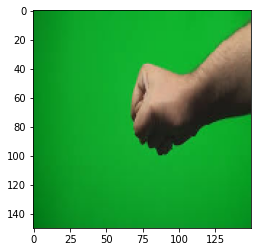

In [91]:
upload = files.upload()
 
for fn in upload.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  thing = np.argmax(classes)

  if thing == 0:
    print('paper')
  elif thing == 1:
    print('rock')
  elif thing == 2:
    print('scissors')
  else:
    print('Unknown object')